In [1]:
# Import of the Modules

from skimage import io
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import pathlib as pl
import json
import warnings
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
warnings.filterwarnings('ignore')

19.829815472802064


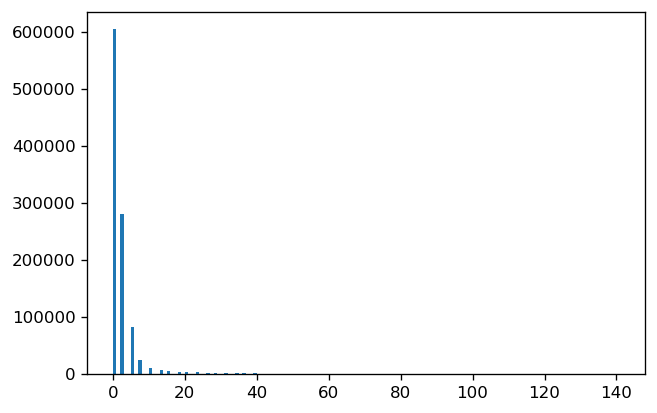

In [45]:
img1 = io.imread('BioInfo_Projekt/t01.tif')
rvl = img1.ravel()
ran = round(max(rvl) - min(rvl))
counts, bins = np.histogram(rvl,bins = ran)

plt.hist(rvl, bins = ran)


#definieren von w0
sum_back = 0 
T = 4
for i in range(0,T):
    sum_back += counts[i]

w0 = sum_back / sum(counts)


#definieren von w1
sum_obj = 0

for j in range(T,len(counts)):
    sum_obj += counts[j]

w1 = sum_obj / sum(counts)


#Varianz 

#Hintergrund Mittelwert
mean_sum_back = 0
for k in range(0, T):
    mean_sum_back += counts[k] * bins[k]

mean_back = mean_sum_back / sum_back

#Vordergrund Mittelwert
mean_sum_obj = 0
for l in range(T, len(counts)):
    mean_sum_obj += counts[l] * bins[l]

mean_obj = mean_sum_obj / sum_obj

#Varianz Hintergrund
var_sum_back = 0
for m in range(0, T):
    var_sum_back += counts[m] * (bins[m] - mean_back)**2 

var_back = var_sum_back / sum_back

#Varianz Vordergrund
var_sum_obj = 0
for n in range(T, len(counts)):
    var_sum_obj += counts[n] * (bins[n] - mean_obj)**2 

var_obj = var_sum_obj / sum_obj

# Within Class Varianz

within_class_varianz = w0 * var_back + w1 * var_obj
print(within_class_varianz)

In [61]:
# bestes T herausfinden
variance_list = list()
for T in range(1,len(counts)):
    #definieren von w0
    sum_back = 0 
    for i in range(0,T):
        sum_back += counts[i]

    w0 = sum_back / sum(counts)


    #definieren von w1
    sum_obj = 0

    for j in range(T,len(counts)):
     sum_obj += counts[j]

    w1 = sum_obj / sum(counts)


    #Varianz 

    #Hintergrund Mittelwert
    mean_sum_back = 0
    for k in range(0, T):
        mean_sum_back += counts[k] * bins[k]

    mean_back = mean_sum_back / sum_back

    #Vordergrund Mittelwert
    mean_sum_obj = 0
    for l in range(T, len(counts)):
        mean_sum_obj += counts[l] * bins[l]

    mean_obj = mean_sum_obj / sum_obj

    #Varianz Hintergrund
    var_sum_back = 0
    for m in range(0, T):
        var_sum_back += counts[m] * (bins[m] - mean_back)**2 

    var_back = var_sum_back / sum_back

    #Varianz Vordergrund
    var_sum_obj = 0
    for n in range(T, len(counts)):
        var_sum_obj += counts[n] * (bins[n] - mean_obj)**2 

    var_obj = var_sum_obj / sum_obj

    # Within Class Varianz

    within_class_varianz = w0 * var_back + w1 * var_obj
    variance_list.append(within_class_varianz)
if within_class_varianz == min(variance_list):
    print(T)
